📊 Sales Summary:
  product  total_qty  revenue
0   Apple         75     37.5
1  Banana         75     22.5
2  Orange         60     42.0


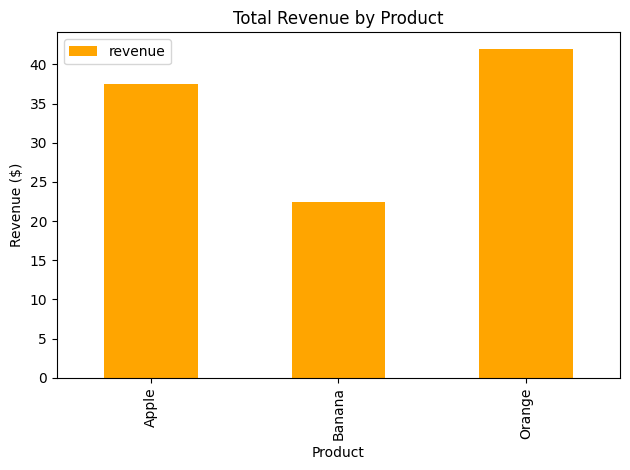

In [3]:
import sqlite3

# Connect to or create the database (in memory for simplicity)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sample data
data = [
    ('Apple', 10, 0.5),
    ('Banana', 20, 0.3),
    ('Apple', 15, 0.5),
    ('Orange', 8, 0.7),
    ('Banana', 5, 0.3),
    ('Orange', 12, 0.7)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)
conn.commit()
import pandas as pd

# Run the SQL query
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
conn.close()

# Display the DataFrame
print("📊 Sales Summary:")
print(df)
import matplotlib.pyplot as plt

# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', color='orange')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()
